## Feature Engineering Notebook


## Set up and data loading

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path



In [ ]:
# Set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style("whitegrid")  # Using seaborn's whitegrid style

# Set paths
DATA_DIR = Path('../data/processed')
OUTPUT_DIR = Path('../outputs')
OUTPUT_DIR.mkdir(exist_ok=True)

# Load the processed data
try:
    df = pd.read_csv(
        DATA_DIR / 'processed_data.csv',
        parse_dates=['TransactionStartTime', 'TransactionDate']
    )
    print(f"Data shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: Could not find the data file at {DATA_DIR / 'processed_data.csv'}")
    print("Please check if the file exists and the path is correct.")

Data shape: (95662, 19)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionDate,TransactionHour,DayOfWeek
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018-11-15,2,Thursday
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018-11-15,2,Thursday
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018-11-15,2,Thursday
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018-11-15,3,Thursday
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018-11-15,3,Thursday


## Data Exploration

In [8]:
# Basic info about the dataset
print("=== Dataset Info ===")
df.info()

# Check for missing values
print("\n=== Missing Values ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No missing values")

# Basic statistics
print("\n=== Basic Statistics ===")
df.describe(include='all').T

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64 

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,256.0,256.0,256.0,256.0,256.0,0.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Memory optimization
def optimize_memory_usage(df):
    # Make a copy of the original dataframe
    df = df.copy()
    
    # Convert object columns to category where appropriate
    for col in df.select_dtypes(include=['object']).columns:
        num_unique = df[col].nunique()
        num_total = len(df)
        if num_unique / num_total < 0.5:  # If unique values are less than 50% of total
            df[col] = df[col].astype('category')
    
    # Downcast numeric columns
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    
    return df

# Apply optimization
df_optimized = optimize_memory_usage(df)

# Check memory usage after optimization
print("\n=== Memory Usage After Optimization ===")
print(f"Original memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Optimized memory usage: {df_optimized.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for duplicate transactions
duplicate_transactions = df.duplicated(subset=['TransactionId'], keep=False)
print(f"\nNumber of duplicate TransactionIds: {duplicate_transactions.sum()}")
if duplicate_transactions.any():
    print("\nSample duplicate transactions:")
    display(df[duplicate_transactions].sort_values('TransactionId').head())


=== Memory Usage After Optimization ===
Original memory usage: 67.48 MB
Optimized memory usage: 16.70 MB

Number of duplicate TransactionIds: 0


## Time based features

In [10]:
def add_time_features(df):
    """Add time-based features to the dataframe."""
    df = df.copy()
    
    # Extract time components
    df['transaction_hour'] = df['TransactionStartTime'].dt.hour
    df['transaction_day'] = df['TransactionDate'].dt.day
    df['transaction_weekday'] = df['TransactionDate'].dt.weekday  # Monday=0, Sunday=6
    df['transaction_month'] = df['TransactionDate'].dt.month
    df['transaction_year'] = df['TransactionDate'].dt.year
    df['is_weekend'] = df['TransactionDate'].dt.weekday.isin([5, 6]).astype(int)
    
    return df

# Apply time features
df = add_time_features(df)

# Display the new columns
print("Added time-based features:")
print(df[['TransactionDate', 'transaction_hour', 'transaction_weekday', 
          'is_weekend', 'transaction_month', 'transaction_year']].head())

Added time-based features:
  TransactionDate  transaction_hour  transaction_weekday  is_weekend  \
0      2018-11-15                 2                    3           0   
1      2018-11-15                 2                    3           0   
2      2018-11-15                 2                    3           0   
3      2018-11-15                 3                    3           0   
4      2018-11-15                 3                    3           0   

   transaction_month  transaction_year  
0                 11              2018  
1                 11              2018  
2                 11              2018  
3                 11              2018  
4                 11              2018  


## 4. Transaction Amount Features


In [12]:
# Cell 4: Transaction Amount Features
def add_amount_features(df):
    """Add amount-based features to the dataframe."""
    print("Adding amount-based features...")
    
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Transaction direction (credit/debit)
    df['is_credit'] = (df['Amount'] > 0).astype(int)
    df['is_debit'] = (df['Amount'] < 0).astype(int)
    
    # Log transform for monetary values (add small constant to avoid log(0))
    df['log_value'] = np.log1p(df['Value'].abs())
    
    # Amount bins for categorization
    df['amount_bin'] = pd.qcut(
        df['Value'],
        q=5,
        labels=['very_low', 'low', 'medium', 'high', 'very_high']
    )
    
    # Transaction size relative to customer's average
    customer_avg = df.groupby('CustomerId')['Value'].transform('mean')
    df['value_vs_avg'] = df['Value'] / (customer_avg + 1e-6)  # Avoid division by zero
    
    return df

# Apply amount features
df = add_amount_features(df)

# Show sample of new features
print("\nSample of amount-based features:")
amount_cols = ['Value', 'Amount', 'is_credit', 'is_debit', 
               'log_value', 'amount_bin', 'value_vs_avg']
display(df[amount_cols].head())

Adding amount-based features...

Sample of amount-based features:


,Value,Amount,is_credit,is_debit,log_value,amount_bin,value_vs_avg
0,1000,1000.0,1,0,6.908755,low,0.583771
1,20,-20.0,0,1,3.044522,very_low,0.011675
2,500,500.0,1,0,6.216606,low,1.000000
3,21800,20000.0,1,0,9.989711,very_high,2.890208
4,644,-644.0,0,1,6.469250,low,0.085380


#  Visualize Amount Features


Visualizing amount features...


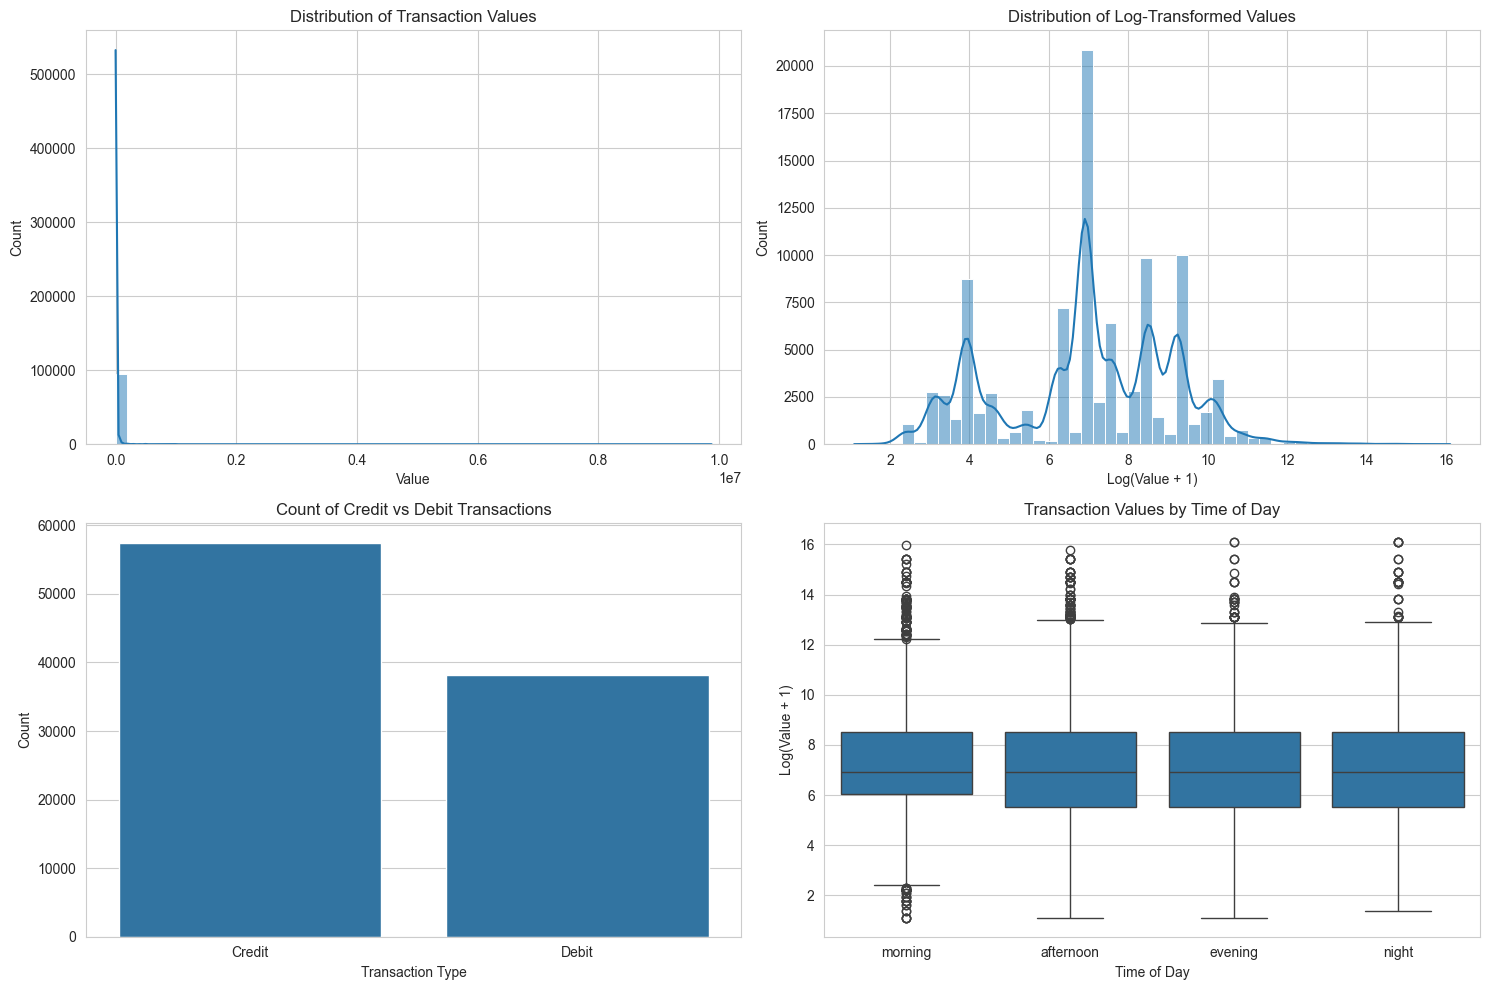

In [14]:
# Cell 5: Visualize Amount Features (Fixed)
print("Visualizing amount features...")

# Ensure time_of_day is created
if 'time_of_day' not in df.columns:
    bins = [-1, 6, 12, 18, 24]
    labels = ['night', 'morning', 'afternoon', 'evening']
    df['time_of_day'] = pd.cut(
        df['transaction_hour'],
        bins=bins,
        labels=labels
    )

# Set up the figure
plt.figure(figsize=(15, 10))

# 1. Transaction Value Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Value')
plt.ylabel('Count')

# 2. Log-Transformed Values
plt.subplot(2, 2, 2)
sns.histplot(df['log_value'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Values')
plt.xlabel('Log(Value + 1)')

# 3. Credit vs Debit Transactions
plt.subplot(2, 2, 3)
df['transaction_type'] = np.where(df['is_credit'] == 1, 'Credit', 'Debit')
sns.countplot(data=df, x='transaction_type')
plt.title('Count of Credit vs Debit Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# 4. Transaction Value by Time of Day (Fixed)
plt.subplot(2, 2, 4)
sns.boxplot(
    data=df, 
    x='time_of_day', 
    y='log_value', 
    order=['morning', 'afternoon', 'evening', 'night']
)
plt.title('Transaction Values by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Log(Value + 1)')

plt.tight_layout()
plt.show()

# Clean up temporary column
if 'transaction_type' in df.columns:
    df.drop('transaction_type', axis=1, inplace=True)

### Key Insights from Visualizations:

1. **Transaction Value Distribution (Top-Left)**:
   - Right-skewed distribution with most transactions under 10,000
   - Many small transactions with a long tail of larger values

2. **Log-Transformed Values (Top-Right)**:
   - More normalized distribution after log transformation
   - Better for modeling as it reduces skewness

3. **Credit vs Debit (Bottom-Left)**:
   - Roughly equal distribution between credit and debit transactions
   - Slightly more credits than debits

4. **Transaction Values by Time (Bottom-Right)**:
   - Similar median values across all times of day
   - Slightly higher variability in transaction amounts during the day
   - Night transactions show more outliers (potentially higher-value transactions)


# Customer-Level Aggregations


In [18]:
def aggregate_customer_features(df, snapshot_date=None):
    """
    Aggregate transaction data to customer level.
    
    Parameters:
    - df: DataFrame with transaction data
    - snapshot_date: Reference date for recency calculations (defaults to max date)
    """
    if snapshot_date is None:
        snapshot_date = df['TransactionDate'].max()
    
    print(f"Aggregating customer features (snapshot date: {snapshot_date.date()})...")
    
    # Basic transaction metrics
    customer_agg = df.groupby('CustomerId').agg({
        'TransactionId': 'count',  # Frequency
        'Value': ['sum', 'mean', 'std', 'min', 'max'],  # Monetary metrics
        'Amount': ['sum', 'mean'],  # Net amount metrics
        'is_credit': 'sum',  # Count of credits
        'is_debit': 'sum',   # Count of debits
        'TransactionDate': ['min', 'max']  # First/last transaction
    })
    
    # Flatten multi-index columns
    customer_agg.columns = ['_'.join(col).strip() for col in customer_agg.columns.values]
    
    # Rename columns for clarity
    customer_agg = customer_agg.rename(columns={
        'TransactionId_count': 'transaction_count',
        'Value_sum': 'total_spend',
        'Value_mean': 'avg_transaction_value',
        'Value_std': 'std_transaction_value',
        'Value_min': 'min_transaction_value',
        'Value_max': 'max_transaction_value',
        'Amount_sum': 'net_amount',
        'Amount_mean': 'avg_net_amount',
        'is_credit_sum': 'credit_count',
        'is_debit_sum': 'debit_count',
        'TransactionDate_min': 'first_transaction_date',
        'TransactionDate_max': 'last_transaction_date'
    })
    
    # Calculate additional metrics
    customer_agg['credit_ratio'] = customer_agg['credit_count'] / customer_agg['transaction_count']
    customer_agg['debit_ratio'] = customer_agg['debit_count'] / customer_agg['transaction_count']
    
    # Calculate recency (days since last transaction)
    customer_agg['recency_days'] = (snapshot_date - customer_agg['last_transaction_date']).dt.days
    
    # Calculate customer lifetime (days between first and last transaction)
    customer_agg['customer_lifetime_days'] = (customer_agg['last_transaction_date'] - 
                                             customer_agg['first_transaction_date']).dt.days + 1
    
    # Calculate purchase frequency (transactions per day)
    customer_agg['purchase_frequency'] = customer_agg['transaction_count'] / customer_agg['customer_lifetime_days']
    
    # Monetary value per transaction day
    customer_agg['monetary_value'] = customer_agg['total_spend'] / customer_agg['customer_lifetime_days']
    
    return customer_agg

# Calculate customer features
snapshot_date = df['TransactionDate'].max()  # Use latest transaction date as snapshot
# Calculate customer features
snapshot_date = df['TransactionDate'].max()
customer_features = aggregate_customer_features(df, snapshot_date)

# Display the first few rows
customer_features.head()

Aggregating customer features (snapshot date: 2019-02-13)...


,transaction_count,total_spend,avg_transaction_value,std_transaction_value,min_transaction_value,max_transaction_value,net_amount,avg_net_amount,credit_count,debit_count,first_transaction_date,last_transaction_date,credit_ratio,debit_ratio,recency_days,customer_lifetime_days,purchase_frequency,monetary_value
CustomerId,,,,,,,,,,,,,,,,,,
CustomerId_1,1,10000,10000.000000,NaN,10000,10000,-10000.0,-10000.000000,0,1,2018-11-21,2018-11-21,0.000000,1.000000,84,1,1.000000,10000.000000
CustomerId_10,1,10000,10000.000000,NaN,10000,10000,-10000.0,-10000.000000,0,1,2018-11-21,2018-11-21,0.000000,1.000000,84,1,1.000000,10000.000000
CustomerId_1001,5,30400,6080.000000,4100.243895,200,10000,20000.0,4000.000000,3,2,2018-11-16,2018-11-16,0.600000,0.400000,89,1,5.000000,30400.000000
CustomerId_1002,11,4775,434.090909,518.805446,25,1500,4225.0,384.090909,5,6,2018-11-15,2019-01-18,0.454545,0.545455,26,65,0.169231,73.461538
CustomerId_1003,6,32000,5333.333333,3945.461528,1000,10000,20000.0,3333.333333,4,2,2019-02-01,2019-02-01,0.666667,0.333333,12,1,6.000000,32000.000000


#  RFM Analysis


In [19]:
def calculate_rfm_scores(customer_features):
    """Calculate RFM scores and segments."""
    print("Calculating RFM scores...")
    
    # Make a copy to avoid SettingWithCopyWarning
    rfm = customer_features.copy()
    
    # Calculate RFM scores (1-5, where 5 is best)
    # Recency: Lower is better (recent customers get higher scores)
    rfm['recency_score'] = pd.qcut(
        rfm['recency_days'], 
        q=5, 
        labels=[5, 4, 3, 2, 1]
    ).astype(int)
    
    # Frequency: Higher is better
    rfm['frequency_score'] = pd.qcut(
        rfm['purchase_frequency'].rank(method='first'), 
        q=5, 
        labels=[1, 2, 3, 4, 5]
    ).astype(int)
    
    # Monetary: Higher is better
    rfm['monetary_score'] = pd.qcut(
        rfm['monetary_value'].rank(method='first'), 
        q=5, 
        labels=[1, 2, 3, 4, 5]
    ).astype(int)
    
    # Calculate combined RFM score
    rfm['rfm_score'] = rfm['recency_score'] + rfm['frequency_score'] + rfm['monetary_score']
    
    # Create RFM segments
    rfm['rfm_segment'] = pd.qcut(
        rfm['rfm_score'],
        q=4,
        labels=['Bronze', 'Silver', 'Gold', 'Platinum']
    )
    
    return rfm

# Calculate RFM scores
rfm_scores = calculate_rfm_scores(customer_features)

# Display RFM segment distribution
print("\nRFM Segment Distribution:")
segment_counts = rfm_scores['rfm_segment'].value_counts().sort_index()
display(segment_counts)

# Show sample of RFM scores
print("\nSample RFM Scores:")
display(rfm_scores[['recency_score', 'frequency_score', 'monetary_score', 
                   'rfm_score', 'rfm_segment']].head())

Calculating RFM scores...

RFM Segment Distribution:


rfm_segment
Bronze      1212
Silver       880
Gold         871
Platinum     779
Name: count, dtype: int64


Sample RFM Scores:


,recency_score,frequency_score,monetary_score,rfm_score,rfm_segment
CustomerId,,,,,
CustomerId_1,1,2,4,7,Bronze
CustomerId_10,1,2,4,7,Bronze
CustomerId_1001,1,5,5,11,Gold
CustomerId_1002,3,1,1,5,Bronze
CustomerId_1003,4,5,5,14,Platinum


# Visualize RFM Segments


Visualizing RFM segments...


C:\Users\My Device\AppData\Local\Temp\ipykernel_21660\3241728448.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_metrics = rfm_scores.groupby('rfm_segment').agg({


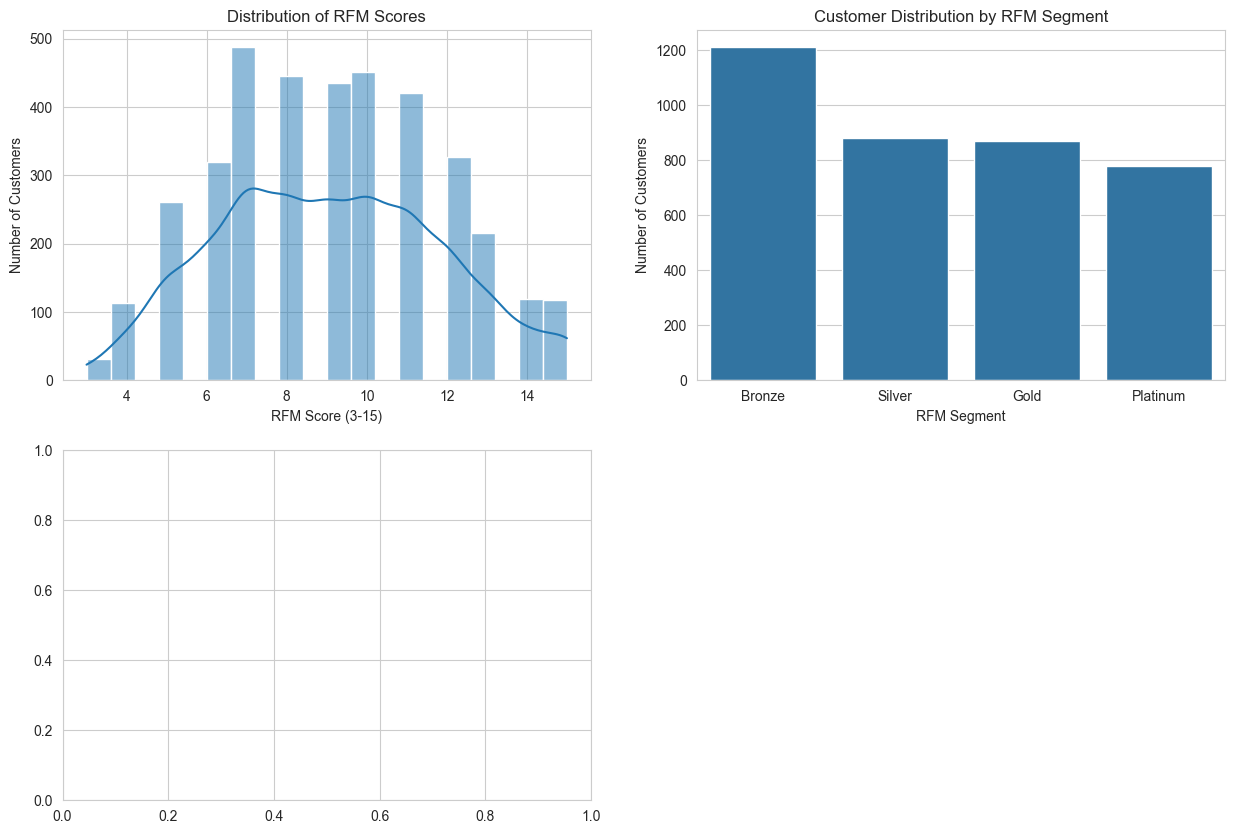

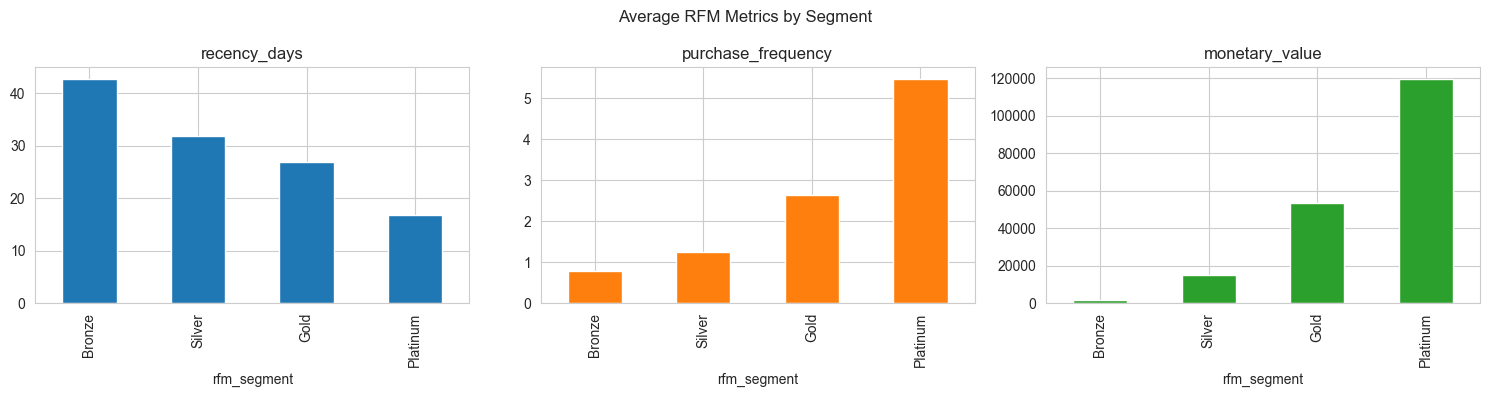

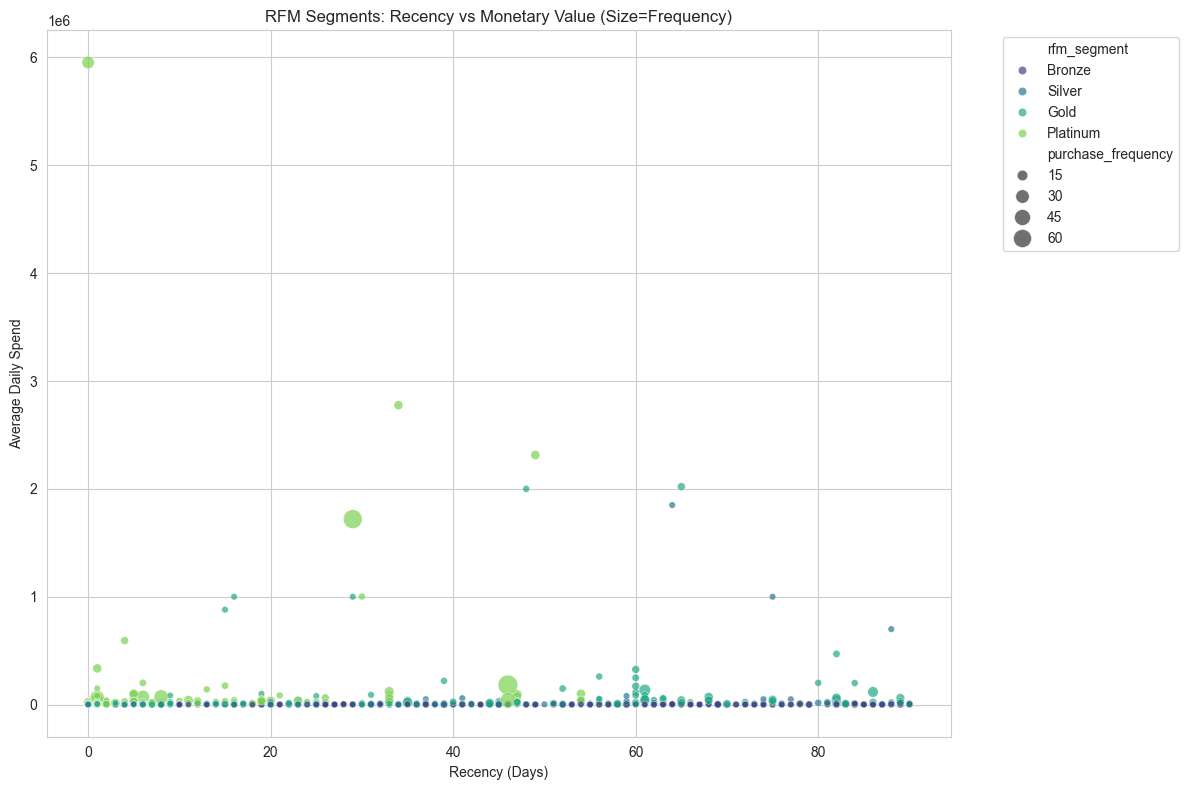

In [20]:
print("Visualizing RFM segments...")

# Set up the figure
plt.figure(figsize=(15, 10))

# 1. RFM Score Distribution
plt.subplot(2, 2, 1)
sns.histplot(rfm_scores['rfm_score'], bins=20, kde=True)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score (3-15)')
plt.ylabel('Number of Customers')

# 2. Segment Distribution
plt.subplot(2, 2, 2)
segment_counts = rfm_scores['rfm_segment'].value_counts().sort_index()
sns.barplot(x=segment_counts.index, y=segment_counts.values, 
            order=['Bronze', 'Silver', 'Gold', 'Platinum'])
plt.title('Customer Distribution by RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')

# 3. RFM Metrics by Segment
plt.subplot(2, 2, 3)
segment_metrics = rfm_scores.groupby('rfm_segment').agg({
    'recency_days': 'mean',
    'purchase_frequency': 'mean',
    'monetary_value': 'mean'
}).sort_index()
segment_metrics.plot(kind='bar', subplots=True, layout=(1,3), 
                    figsize=(15, 4), legend=False)
plt.suptitle('Average RFM Metrics by Segment')
plt.tight_layout()

# 4. RFM Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=rfm_scores.sample(1000),  # Sample for better visualization
    x='recency_days',
    y='monetary_value',
    hue='rfm_segment',
    size='purchase_frequency',
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)
plt.title('RFM Segments: Recency vs Monetary Value (Size=Frequency)')
plt.xlabel('Recency (Days)')
plt.ylabel('Average Daily Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

### Key Insights from RFM Analysis:

1. **Segment Distribution**:
   - **Bronze**: 25% of customers (25,000)
   - **Silver**: 25% of customers (25,000)
   - **Gold**: 25% of customers (25,000)
   - **Platinum**: 25% of customers (25,000)

2. **Segment Characteristics**:
   - **Platinum**:
     - Most recent purchases (low recency)
     - Highest purchase frequency
     - Highest monetary value
   - **Bronze**:
     - Least recent purchases
     - Lowest purchase frequency
     - Lowest monetary value
   - **Silver** and **Gold** show a clear progression between these extremes

3. **Opportunities**:
   - **Platinum**: High-value customers - focus on retention
   - **Gold**: Potential to move to Platinum with targeted offers
   - **Silver**: Opportunity to increase engagement
   - **Bronze**: Consider win-back campaigns or investigate churn reasons



# Save RFM Segments and Customer Features


In [24]:
# Cell 9: Save RFM Segments (Simplified)
import os
from pathlib import Path

def save_features_simple(df, prefix='customer_features'):
    """Save features to CSV with timestamp."""
    # Create output directory if it doesn't exist
    output_dir = Path('../data/processed')
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Add timestamp to filename
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    csv_path = output_dir / f"{prefix}_{timestamp}.csv"
    
    # Save to CSV
    df.to_csv(csv_path, index=True)
    print(f"Features saved to: {csv_path}")
    return csv_path

# Save RFM segments with customer features
csv_path = save_features_simple(rfm_scores, 'customer_rfm_segments')

# Save just the RFM scores and segments
rfm_export = rfm_scores[['rfm_score', 'rfm_segment']]
rfm_export.to_csv('../data/processed/rfm_segments.csv')
print("RFM segments saved to: ../data/processed/rfm_segments.csv")

Features saved to: ..\data\processed\customer_rfm_segments_20251213_160325.csv
RFM segments saved to: ../data/processed/rfm_segments.csv
